# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1

**Правила:**

* Решения задач нужно отправить через <a target="_blank" href="https://forms.gle/f1KpVHX53ibmuURV7">форму</a>. Если ответ пришел, придет ответ от автоответчика. Изменять решения до дедлайна можно по кнопке "изменить ответ", которая находится в письме от автоответчика.
* Дедлайн **4 апреля 23:59**. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины. Даже если форма еще открыта, что делается для сдающих позже по уважительной причине.
* Любую уважительную причину нужно подтвердить документально, прикрепив скан или фото в форму.
* **По задачам 1-2** необходимо отправить фото в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. **Каждую задачу необходимо отправить отдельной фотографией без посторонних записей.**
* **По задачам 3-6** необходимо отправить ноутбук с **выполненным кодом**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$. 
* Найдите оценку $\theta$ по методу моментов;
* Найдите оценку $\theta$ по методу максимального правдоподобия;
* Проверьте полученные оценки на несмещенность и состоятельность.

-----

### Задача 2

Дана выборка $X_1, ..., X_n$ из нормального распределения $\mathcal{N}(a, \sigma^2)$. 
* Найдите оценку максимального правдоподобия параметра $\theta = (a, \sigma)$. 
* Оценку для $a$ проверьте на несмещенность и состоятельность.


__________________
### Задача 3
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде *python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества*. Вы можете их копировать прямо в код, как в одном из примеров ниже. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [3]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    """
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample).reshape((1, -1))
        # используйте метод prod(axis=...)
        likelihood = np.prod(density_function(sample),axis = 1)
        
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

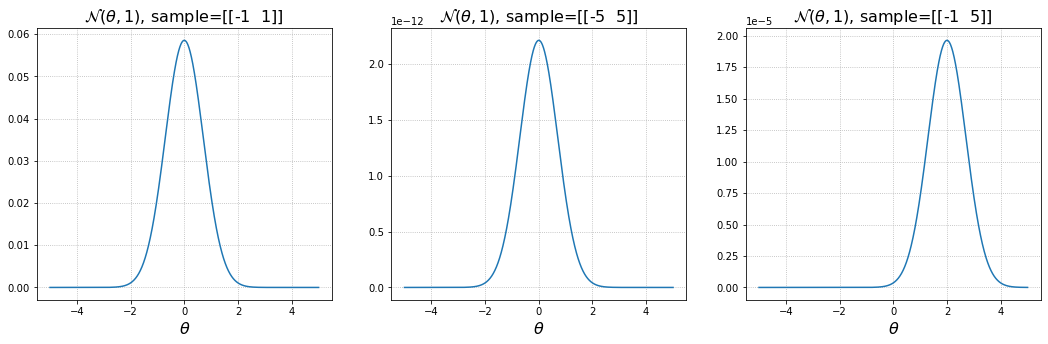

In [4]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

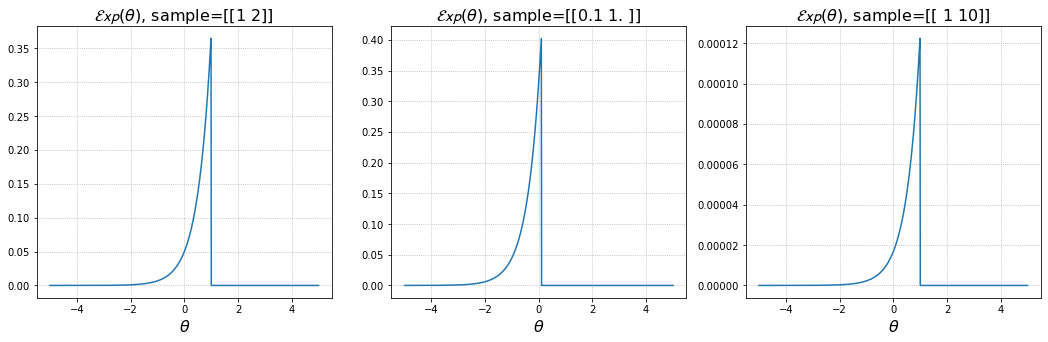

In [5]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(loc=grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$\\mathcal{Exp}(\\theta)$')

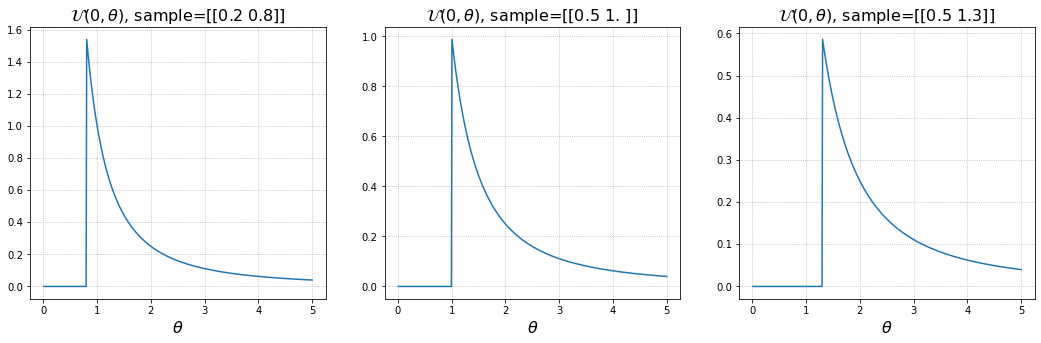

In [6]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale = grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$\\mathcal{U}(0, \\theta)$')

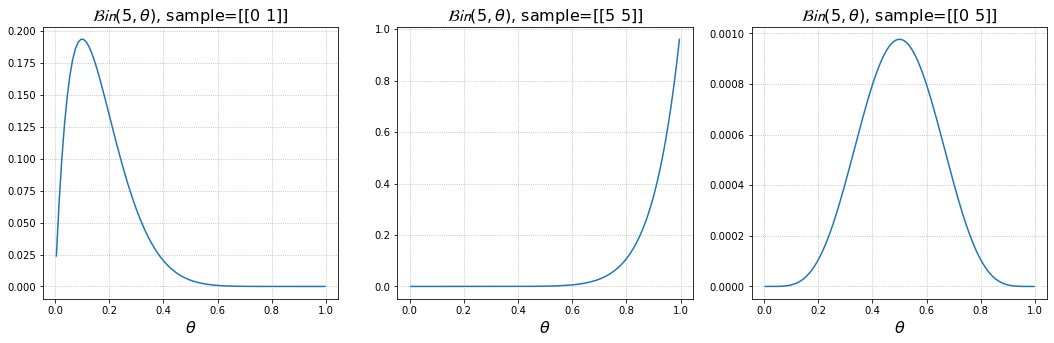

In [7]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(5, grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}(5,\\theta)$')

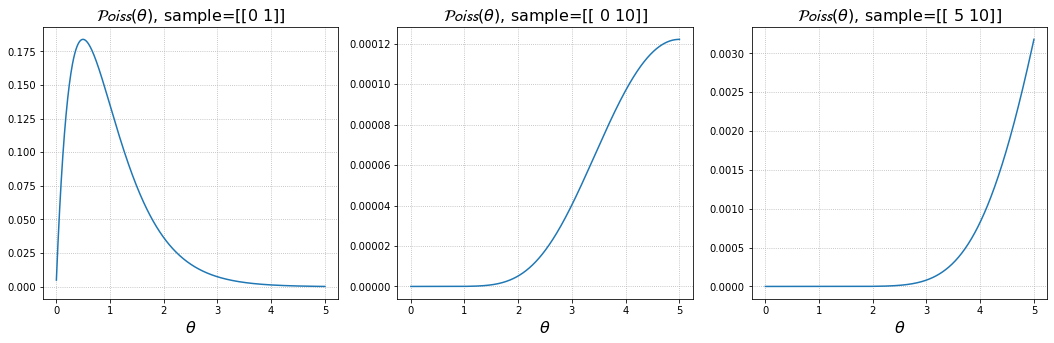

In [8]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu = grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Poiss}(\\theta)$')

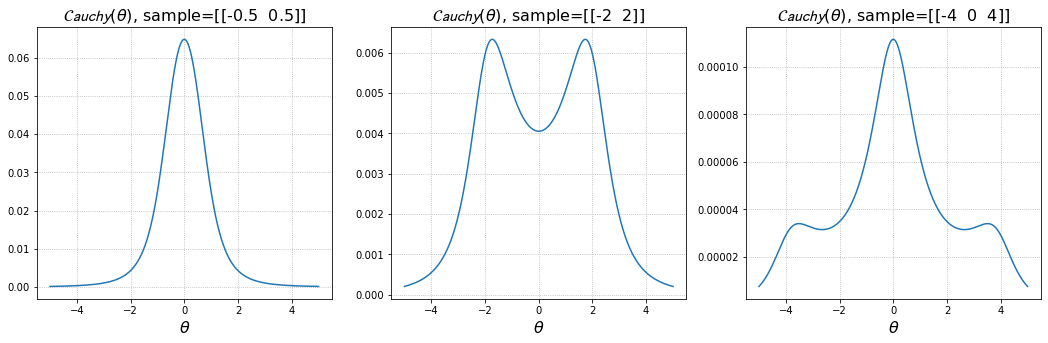

In [9]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
               [[-0.5, 0.5], [-2, 2], [-4, 0, 4]] , '$\\mathcal{Cauchy}(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

**Нормальное распределение**: для выборок, симметричных относительно 0, функции одинаковы и отличаются только значением максимума, для остальныз выборок будет сдвиг пика по оси theta и также будут отличатся значения максимумов
**Экспоненциальное**: для всех выборок ширина пика одинаковая, но высоты максимумов отличаются, наибольшее значение достигается в точке theta = точке из выборки с наименьшим значением
**Uniform**: Максимум функции достигается при theta =  наибольшей по значению точке выборки
**Bin**: Для выборок, в которые входит точка 0 график функции распределения имеет выраженный максимум - "колокол", на участках вне пика функция напоминает экспоненту.
**Poiss**: Для выборок с близкими по значению элементами функция имеет участки возрастания и убывания, для остальных -- только возрастание
**Cauchy**: функция всегда имеет экстремум в точке theta =  0. Для первой выборки он один, для остальных, вылючающих точки >1 число наблюдаемых экстремумов увеличивается в зависимости от дальности расположения элементов Xi на прямой x и от количества точек выборки. Значение в максимуме функции уменьшается, когда увеличивается расстояние между самыми удаленными элементами выборки. 
**Функция правдоподобия** является плотностью вероятности совместного появления всех элементов выборки

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [10]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Результат отличается от ожидаемого, так как для выборки большого размера, большая часть точек будет располагаться вне "купола" нормального распределения, то есть значения в этих точках очень маленькие. При перемножении этих значений итоговое значение функции правдоподобия будет малым и Python в этом случае будет выводить 0. Проблему можно решить, если использовать логарифм функции правдоподобия, который в итоге будет представлен как логарифм произведения = логарифм суммы. В этом случае значение уже существенно.

In [11]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142194.77853270108


----

## Задачи типа B (необходимо на "отл")

----
### Задача 4
В этой задаче нужно визуализировать *свойство состоятельности*.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U(0, \theta)$. Известно, что оценки $\theta^* = 2\overline{X}, \widehat{\theta} = \max_i X_i$ являются состоятельными оценками $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них указанные выше оценки параметра $\theta$ в зависимости от размера выборки и визуализировав их состоятельность.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leqslant j \leqslant 300$.<br>
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$, $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leqslant n \leqslant 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [6]:
theta_1 = np.zeros((300, 500))
theta_2 = np.zeros((300, 500))
n = np.linspace(1, 501, 500)

for i in range(300):
    sample = sps.uniform.rvs(size=500)
    sample_1 = np.cumsum(sample)/n
    sample_2 = np.maximum.accumulate(sample)
    
    theta_1[i] = 2 * sample_1
    theta_2[i] = sample_2 
    



Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

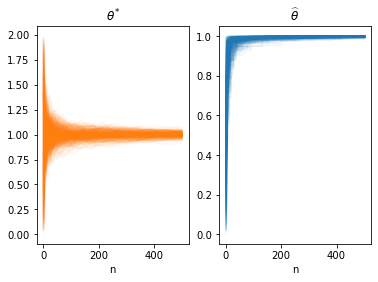

In [36]:
fig, axs = plt.subplots(1, 2)
for i in range(300):
    axs[0].plot(n, theta_1[i], 'tab:orange', alpha = 0.05)
    axs[1].plot(n, theta_2[i], 'tab:blue', alpha = 0.05)
    
    axs[0].set_title('$\\theta^{*}$')
    axs[1].set_title('$\\widehat{\\theta}$')
    for ax in axs.flat:
        ax.set(xlabel='n', ylabel=None)      
plt.show()
    
    

Сделайте вывод о смысле свойства состоятельности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** Из графиков можно видеть, что все оценки выходят на значение $\theta = 1$, то есть все оценки стремятся к 1, когда n стремится к бесконечности. Из теории: свойство состоятельности означает, что оценка стремится по вероятности к матожиданию распределения. Матож равномерного распределения равно $(a + b)/2$, где а в нашем случае равно 0, а b равно theta. Получается, что оценки должны сходится по вероятности к $\theta/2$. Тогда $\theta$ = 2.

__________________
### Задача 5

Загрузите данные об экспрессии гена FAM129A из файла `FAM129A.txt` с помощью функции `np.loadtxt`. Постройте гистограмму функцией `plt.hist`, указав в параметре `bins` оптимальное количество разбиений.

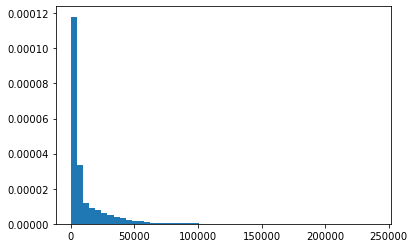

In [4]:
fname = "FAM129A.txt"
file = np.loadtxt(fname)
plt.hist(file, 50, density = True)
plt.show()

В предположении, что данные имеют пуассоновское распределение, найдите оценку максимального правдоподобия параметра распределения. Нарисуйте график дискретной плотности полученного распределения и сравните его с гистограммой. Хорошо ли оценка распределения приближает данные?

10034.47852498289


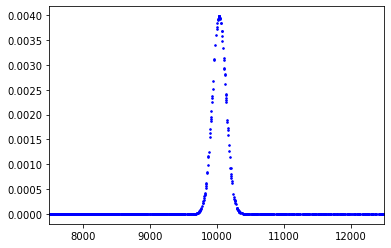

In [48]:
#Из задачи 1 п.2  решим уравнение относительно theta для данной выборки
from scipy.special import factorial
from scipy.stats import poisson
import math

theta = np.mean(file)
print(theta)
y = poisson.pmf(file, mu=theta)
plt.scatter(file, y, color = 'b', marker = '.', s = 10)
plt.xlim(7500,12500)
plt.show()


**Вывод** Получается, что оценка распределения плохо приближает данные, так как график не имеет максимума в 0, в отличие от гистограммы

__________________
### Задача 6
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки 
* $2\overline{X}$, 
* $(n+1) \min_i X_i$,
* $\min_i X_i + \max_i X_i$,
* $\frac{n+1}{n} \max_i X_i$. 

Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ &mdash; одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

In [ ]:
plt.plot(<сетка по параметру>, <функция риска>,
         label=<latex-метка>)  # для каждой оценки
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(<тип функции потерь>, fontsize=16)
plt.ylim((0, <ограничение сверху>))

**Решение:**

In [ ]:
<...>

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** <...>